In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

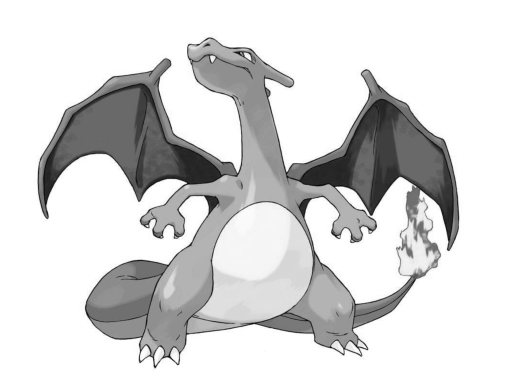

In [8]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
def gaussian_kernel(size, sigma):
    k = size // 2 
    x, y = np.meshgrid(np.linspace(-k, k, size), np.linspace(-k, k, size))
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

In [12]:
def apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i-1:i+2, j-1:j+2]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

In [13]:
gaussian_filter_1 = gaussian_kernel(3, 1)
gaussian_filter_2 = gaussian_kernel(3, 3)

In [14]:
new_image_1 = apply_mask(image, gaussian_filter_1)
new_image_2 = apply_mask(image, gaussian_filter_2)

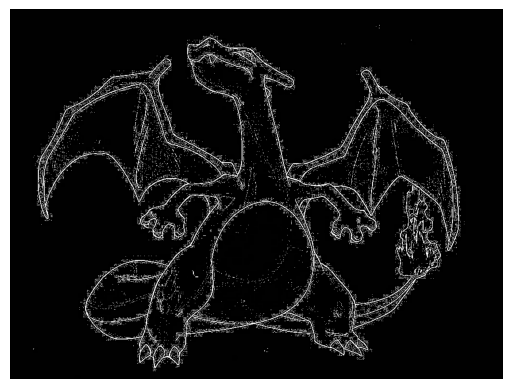

In [17]:
difference_of_gaussians = new_image_1 - new_image_2
plt.imshow(difference_of_gaussians, cmap="gray")
plt.axis("off")
plt.show()